# Gradient Boosted Trees for Classification

### Importing Libraries

In [1]:
import pandas as pd
import warnings
import seaborn as sns
import numpy as np

warnings.filterwarnings("ignore")

### Importing and Exploring the Data

In [3]:
df = pd.read_csv("heart.csv")

# display first few rows of data
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
print(f"ChestPainType {pd.unique(df.ChestPainType)} RestingECG  {pd.unique(df.RestingECG)} ST_Slope {pd.unique(df.ST_Slope)}")


ChestPainType ['ATA' 'NAP' 'ASY' 'TA'] RestingECG  ['Normal' 'ST' 'LVH'] ST_Slope ['Up' 'Flat' 'Down']


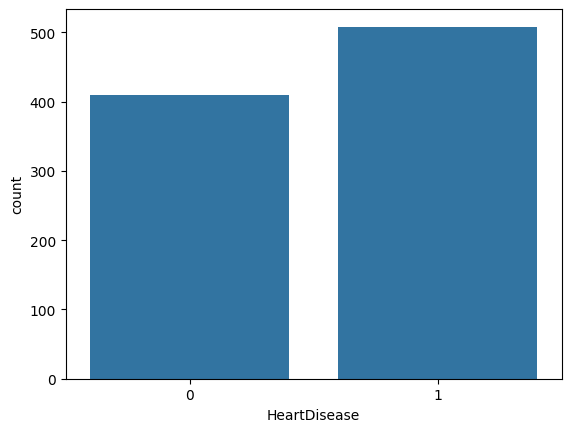

In [5]:
# check distribution of heart disease
ax = sns.countplot(x ="HeartDisease", data = df)

#### From the above count plot we see that the dataset is quite balanced



### Data Preprocessing

In [6]:
# sex
df['Sex'] = df['Sex'].replace(['F','M'],['0', '1'])

# chest pain type
df['ChestPainType'] = df['ChestPainType'].replace(['TA', 'ATA','NAP', 'ASY'], ['1', '2', '3', '4'])

# resting ecg
df['RestingECG'] =df['RestingECG'].replace(['Normal', 'ST', 'LVH'], ['0', '1', '2'])

# exercise angina
df['ExerciseAngina'] = df['ExerciseAngina'].replace(['N', 'Y'], ['0', '1'])

# ST slope
df['ST_Slope'] = df['ST_Slope'].replace(['Up', 'Flat', 'Down'], ['1', '2', '3'])

# check changes
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


### Constructing Gradient Boosted Trees for Classification


In [9]:
from sklearn.model_selection import train_test_split

# splitting data
X = df.drop(["HeartDisease"], axis=1)
y = df[["HeartDisease"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clas = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, random_state=0)
gb_clas = gb_clas.fit(X_train, y_train)

# generating predictions
y_pred = gb_clas.predict(X_test)

### Model evaluation

### Confusion Matrix

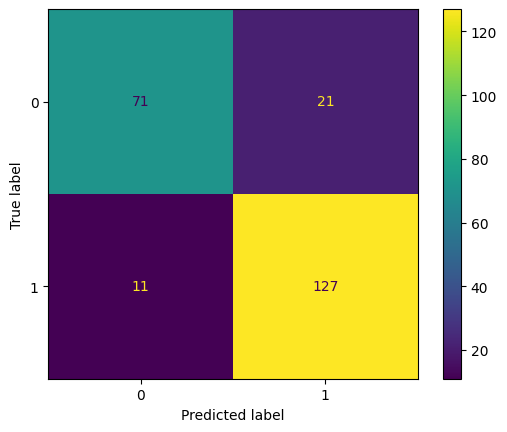

In [11]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)

cm_display.plot()

### f1 score


In [12]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.8881118881118881

### AUROC score


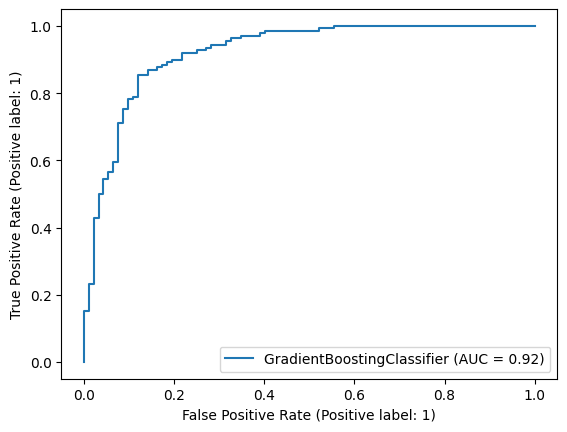

In [14]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(gb_clas, X_test, y_test)


In [15]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, gb_clas.decision_function(X_test))

0.9227315689981096

### Forming a prediction


In [16]:
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [17]:
obs = [[54, 1, 2, 122, 0, 0, 0, 149, 0, 0.5, 2]]

gb_clas.predict(obs)

array([0], dtype=int64)

### Feature Importance


In [18]:
df_feature_importance = pd.DataFrame(gb_clas.feature_importances_, index = X.columns, columns = ["Feature Score"])

# sort values into descending order
df_feature_importance.sort_values(by = "Feature Score", ascending=False, inplace = True)

df_feature_importance

,Feature Score
ST_Slope,0.524203
ChestPainType,0.103075
MaxHR,0.077767
Oldpeak,0.065709
Cholesterol,0.052679
Sex,0.040593
ExerciseAngina,0.037718
Age,0.031694
RestingBP,0.031247
FastingBS,0.021645


### Conclusion
The Gradient Boosted Trees classifier demonstrated strong performance in predicting heart disease based on clinical features from the dataset. Data preprocessing transformed categorical variables effectively for model training, and the dataset was confirmed to be balanced, which supports reliable model evaluation.

The model achieved a high F1 score, indicating a good balance between precision and recall, and an excellent AUROC score, reflecting strong discriminatory power between patients with and without heart disease. The confusion matrix visualization further validated accurate classification with relatively few misclassifications.

Feature importance analysis revealed which clinical indicators contributed most significantly to the model’s decisions, adding interpretability and insights that can guide clinical focus and future investigations.

The ability to form predictions on new observations shows practical applicability in real-world scenarios, potentially aiding risk assessment and early intervention.

Overall, Gradient Boosted Trees proved to be a powerful and interpretable tool for heart disease classification, combining robust predictive accuracy with valuable feature insights.